This is my first kaggle project submission. Please add comment, if any changes required

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing    
le = preprocessing.LabelEncoder()

from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_train_df = pd.read_csv('../input/titanic/train.csv')
titanic_test_df  = pd.read_csv('../input/titanic/test.csv')

In [3]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train_df.shape

(891, 12)

In [5]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def findtitle(line):   
    splitLine = line.split(',')
    name = splitLine[1].split('.')
    title = name[0].strip()
    return title

In [9]:
def BuiltBarGraph(df_plt,feature):
  survived = df_plt[df_plt['Survived']==1][feature].value_counts()
  dead = df_plt[df_plt['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

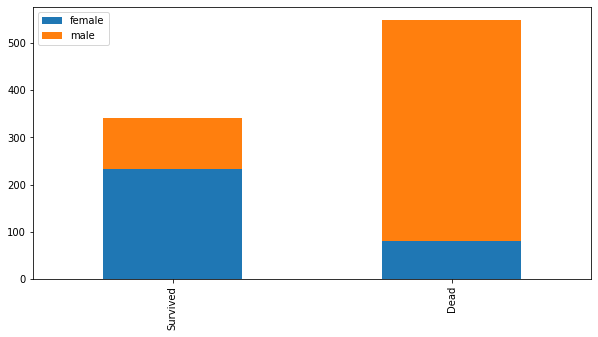

In [10]:
BuiltBarGraph(titanic_train_df,'Sex')

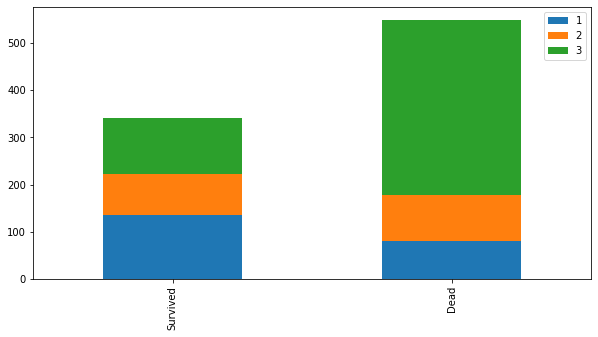

In [11]:
BuiltBarGraph(titanic_train_df,'Pclass')

In [12]:
titanic_train_df['Title'] = titanic_train_df['Name'].apply(findtitle)
titanic_test_df['Title'] = titanic_test_df['Name'].apply(findtitle)

In [13]:
titanic_train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [14]:
titanic_train_df['Title'] = titanic_train_df['Title'].replace(to_replace =["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer","Dona","the Countess"], value ="Other")
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Mlle', 'Miss')
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Ms', 'Miss')
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Mme', 'Mrs')


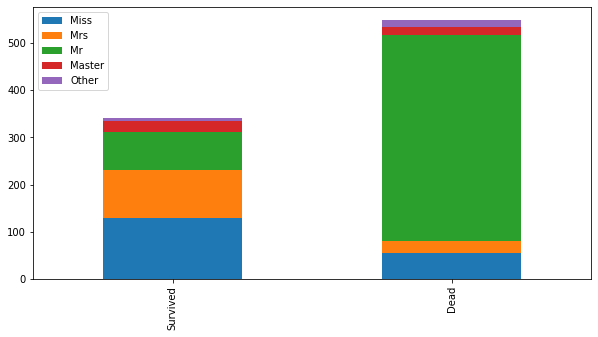

In [15]:
BuiltBarGraph(titanic_train_df,'Title')

In [16]:
titanic_train_df['Title'] = le.fit_transform(titanic_train_df['Title'])

In [17]:
titanic_test_df['Title'] = titanic_test_df['Title'].replace(to_replace =["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer","Dona","the Countess"], value ="Other")
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Mlle', 'Miss')
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Ms', 'Miss')
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Mme', 'Mrs')

titanic_test_df['Title'] = le.fit_transform(titanic_test_df['Title'])

In [18]:
titanic_train_df['Cabin'].isnull().sum()

687

In [19]:
titanic_train_df = titanic_train_df.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)
titanic_test_df = titanic_test_df.drop(['Cabin','Name','Ticket'], axis=1)

In [20]:
titanic_train_df['Fare'].fillna(titanic_train_df.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)
titanic_test_df['Fare'].fillna(titanic_test_df.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)
titanic_train_df['Embarked'].fillna('S', inplace = True)
titanic_test_df['Embarked'].fillna('S', inplace = True)

In [21]:
sex_mapping = {"male": 0, "female": 1}
titanic_train_df['Sex'] = titanic_train_df['Sex'].map(sex_mapping)
titanic_test_df['Sex'] = titanic_test_df['Sex'].map(sex_mapping)

In [22]:
Embark =  {'S': 0, 'C': 1, 'Q': 2}
titanic_train_df['Embarked'] = titanic_train_df['Embarked'].map(Embark )
titanic_test_df['Embarked'] = titanic_test_df['Embarked'].map(Embark)

In [23]:
# split data
train = titanic_train_df.loc[(titanic_train_df.Age.notnull())]  # known age values
test = titanic_train_df.loc[(titanic_train_df.Age.isnull())]  # all nan age values

# select age column
y = train.values[:,3]

# select pclass and sex
X = train.values[:, [1, 2, 8]]

# create RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

# Fit a model
rfr.fit(X, y)

# Use the fitted model to predict the missing values
predictedAges = rfr.predict(test.values[:, [1, 2,8]])

# create predicted age column
titanic_train_df['pred_age'] = titanic_train_df.Age

# fill column
titanic_train_df.loc[(titanic_train_df.pred_age.isnull()), 'pred_age'] = predictedAges 

In [24]:
# split data
train = titanic_test_df.loc[(titanic_test_df.Age.notnull())]  # known age values
test = titanic_test_df.loc[(titanic_test_df.Age.isnull())]  # all nan age values

# select age column
y = train.values[:,3]

# select pclass and sex
X = train.values[:, [1, 2, 8]]

# create RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

# Fit a model
rfr.fit(X, y)

# Use the fitted model to predict the missing values
predictedAges = rfr.predict(test.values[:, [1, 2,8]])

# create predicted age column
titanic_test_df['pred_age'] = titanic_test_df.Age

# fill column
titanic_test_df.loc[(titanic_test_df.pred_age.isnull()), 'pred_age'] = predictedAges 

In [25]:
titanic_train_df['Age'].max()

80.0

In [26]:
bins= [0,2,4,13,20,35,66, 120]
#labels = ['Infant','Toddler','Kid','Teen','Adult','Older','Senior Citizens']
labels = ['0','1','2','3','4','5','6']

In [27]:
titanic_train_df['AgeGroup'] = pd.cut(titanic_train_df['pred_age'], bins=bins, labels=labels, right=False)
titanic_test_df['AgeGroup'] = pd.cut(titanic_test_df['pred_age'], bins=bins, labels=labels, right=False)

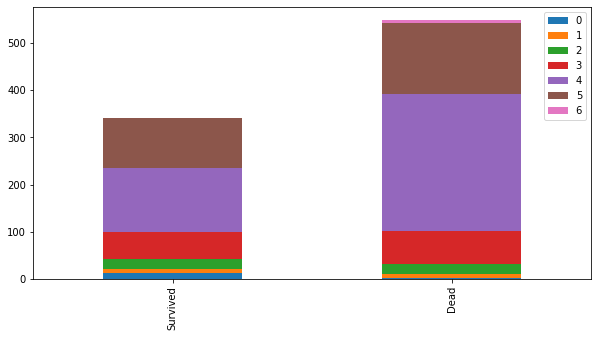

In [28]:
BuiltBarGraph(titanic_train_df,'AgeGroup')

In [29]:
titanic_train_df['Fare'] = titanic_train_df['Fare'].round(0).astype(int)
titanic_test_df['Fare'] = titanic_test_df['Fare'].round(0)

In [30]:
titanic_train_df['TotFam'] = titanic_train_df['SibSp'] + titanic_train_df['Parch'] + 1
titanic_test_df['TotFam'] = titanic_test_df['SibSp'] + titanic_test_df['Parch'] + 1

In [31]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,pred_age,AgeGroup,TotFam
0,0,3,0,22.0,1,0,7,0,2,22.0,4,2
1,1,1,1,38.0,1,0,71,1,3,38.0,5,2
2,1,3,1,26.0,0,0,8,0,1,26.0,4,1
3,1,1,1,35.0,1,0,53,0,3,35.0,5,2
4,0,3,0,35.0,0,0,8,0,2,35.0,5,1


In [32]:
titanic_train_df = titanic_train_df.drop(['SibSp','Parch','Age'], axis=1)
titanic_test_df = titanic_test_df.drop(['SibSp','Parch','Age'], axis=1)

In [33]:
X_train = titanic_train_df.drop("Survived", axis=1)
Y_train = titanic_train_df["Survived"]
X_test  = titanic_test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [34]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

96.97

In [35]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'PassengerId':titanic_test_df['PassengerId'],'Survived':Y_pred})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [36]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'TitanicPredictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: TitanicPredictions.csv


References:

https://www.youtube.com/watch?v=8yZMXCaFshs

https://www.kaggle.com/jlawman/complete-beginner-your-first-titanic-submission

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/aymanlafaz/titanic-kaggle-solution

I couldnt find one link from stackoverflow, which i refered to guess missing age